In [1]:
import os
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
from torchvision.datasets import MNIST
from torchvision.models.alexnet import AlexNet

# torchvision.disable_beta_transforms_warning()
# from torchvision.transforms.v2 import Lambda, Compose, ToTensor
from torchvision.transforms import Lambda, Compose, ToTensor

In [2]:
torch.manual_seed(21)

In [3]:
print(torchvision.__version__)
print(sys.executable)

0.13.1+cu113
/state/partition1/llgrid/pkg/anaconda/anaconda3-2022b/bin/python


In [4]:
expand = Lambda(lambda x: x.expand(3, -1, -1))
transforms = Compose([
    ToTensor(),
    expand,
])

In [5]:
dataset = MNIST(root="/home/gridsan/jpmcd/data", transform=transforms)
test_dataset = MNIST(root="/home/gridsan/jpmcd/data", train=False, transform=transforms)

In [6]:
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=32,
)

In [ ]:
model = AlexNet()

In [7]:
model = torch.nn.Sequential(
    nn.Conv2d(3, 32, 3),
    nn.ReLU(),
    nn.Conv2d(32, 64, 3),
    nn.ReLU(),
    nn.Flatten(-3),
    nn.Linear(36864, 128),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(128, 10),
)

In [8]:
model.to("cuda")

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=-3, end_dim=-1)
  (5): Linear(in_features=36864, out_features=128, bias=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
loss_fcn = nn.CrossEntropyLoss()
# loss_fcn.to("cuda")  # not necessary

In [10]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4)

In [48]:
model.train()
for i, batch in enumerate(tqdm(dataloader)):
    x, y = batch
    x = x.to("cuda")
    y = y.to("cuda")
    logits = model(x)
    loss = loss_fcn(logits, y)
    loss.backward()
    opt.step()
    if i % 50 == 0:
        print(f"batch {i}: loss = {loss}...")
    opt.zero_grad()

  1%|▏         | 24/1875 [00:00<00:16, 108.99it/s]

batch 0: loss = 2.3088035583496094...


  5%|▌         | 102/1875 [00:00<00:08, 219.41it/s]

batch 50: loss = 1.507854700088501...
batch 100: loss = 0.9258490800857544...


 10%|▉         | 183/1875 [00:00<00:06, 250.66it/s]

batch 150: loss = 0.7399029731750488...
batch 200: loss = 0.7708163857460022...


 16%|█▌        | 291/1875 [00:01<00:06, 260.47it/s]

batch 250: loss = 0.39486855268478394...
batch 300: loss = 0.43546178936958313...


 21%|██▏       | 399/1875 [00:01<00:05, 262.44it/s]

batch 350: loss = 0.3810146152973175...
batch 400: loss = 0.7175247669219971...


 26%|██▌       | 480/1875 [00:02<00:05, 262.39it/s]

batch 450: loss = 0.6247545480728149...
batch 500: loss = 0.5411564111709595...


 31%|███▏      | 588/1875 [00:02<00:04, 262.16it/s]

batch 550: loss = 0.21815545856952667...
batch 600: loss = 0.5080446004867554...


 37%|███▋      | 696/1875 [00:02<00:04, 263.98it/s]

batch 650: loss = 0.22808468341827393...
batch 700: loss = 0.36203768849372864...


 41%|████▏     | 777/1875 [00:03<00:04, 260.19it/s]

batch 750: loss = 0.2429976463317871...
batch 800: loss = 0.4043055474758148...


 47%|████▋     | 885/1875 [00:03<00:03, 261.07it/s]

batch 850: loss = 0.2478528916835785...
batch 900: loss = 0.19757939875125885...


 53%|█████▎    | 993/1875 [00:03<00:03, 264.48it/s]

batch 950: loss = 0.3931524157524109...
batch 1000: loss = 0.25182175636291504...


 59%|█████▊    | 1101/1875 [00:04<00:02, 262.62it/s]

batch 1050: loss = 0.3710017800331116...
batch 1100: loss = 0.22734862565994263...


 63%|██████▎   | 1182/1875 [00:04<00:02, 262.56it/s]

batch 1150: loss = 0.40783587098121643...
batch 1200: loss = 0.30888354778289795...


 69%|██████▉   | 1290/1875 [00:05<00:02, 262.45it/s]

batch 1250: loss = 0.30886518955230713...
batch 1300: loss = 0.5243858098983765...


 75%|███████▍  | 1398/1875 [00:05<00:01, 261.45it/s]

batch 1350: loss = 0.06931706517934799...
batch 1400: loss = 0.1506093293428421...


 79%|███████▉  | 1479/1875 [00:05<00:01, 262.80it/s]

batch 1450: loss = 0.1016358807682991...
batch 1500: loss = 0.15782636404037476...


 85%|████████▍ | 1587/1875 [00:06<00:01, 264.56it/s]

batch 1550: loss = 0.10296451300382614...
batch 1600: loss = 0.12375301122665405...


 90%|█████████ | 1695/1875 [00:06<00:00, 262.25it/s]

batch 1650: loss = 0.11021126806735992...
batch 1700: loss = 0.13407491147518158...


 96%|█████████▌| 1803/1875 [00:07<00:00, 261.21it/s]

batch 1750: loss = 0.24715471267700195...
batch 1800: loss = 0.19615212082862854...


100%|██████████| 1875/1875 [00:07<00:00, 255.94it/s]

batch 1850: loss = 0.0784507542848587...


In [11]:
loss

tensor(0.0973, device='cuda:0', grad_fn=<NllLossBackward0>)

In [11]:
model.eval()
ind = 2
print(f"label: {test_dataset[ind][1]}")
x = test_dataset[ind][0].to("cuda")
logits = model(x)
y_pred = torch.argmax(logits)
print(f"pred: {y_pred}")

label: 1
pred: 6


In [53]:
tot = 0
cor = 0
model.eval()
for batch in tqdm(test_dataloader):
    x = batch[0].to("cuda")
    y = batch[1]
    logits = model(x)
    y_pred = torch.argmax(logits, 1).cpu()
    cor += y.eq(y_pred).sum().item()
    tot += len(y)
acc = cor/tot

100%|██████████| 313/313 [00:00<00:00, 337.39it/s]


In [54]:
acc

0.9685

In [22]:
y_pred.shape

torch.Size([32])

In [23]:
torch.eq(y, y_pred).sum

tensor([False, False, False, False,  True, False,  True, False, False, False,
        False,  True, False, False, False, False, False, False, False,  True,
        False,  True,  True, False,  True, False, False,  True, False, False,
        False, False])

In [36]:
y_pred.cpu().dtype

torch.int64

In [15]:
z = torch.tensor([])

In [20]:
torch.cat((z, torch.tensor([1, 2])))

tensor([1., 2.])

## Cruft

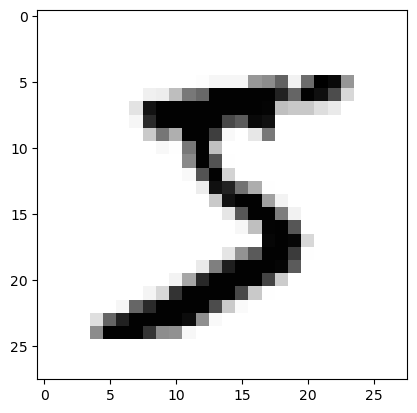

In [ ]:
plt.imshow(dataset[0][0], cmap="Greys")

In [5]:
batches = iter(dataloader)
batch = next(batches)
len(batch)

2

In [6]:
x, y = batch
print(x.shape)
print(y.shape)

torch.Size([32, 3, 28, 28])
torch.Size([32])


In [7]:
x[0].shape

torch.Size([3, 28, 28])

In [ ]:
out = model(x[0])

In [18]:
out.shape

torch.Size([10])

# Hugging Face

In [1]:
import transformers
import datasets

In [2]:
transformers.__version__

'4.36.2'

In [3]:
datasets.__version__

'2.16.1'

In [4]:
model_name = "/home/gridsan/jpmcd/languagemodels/models/Llama-2-7b-hf-causal"

In [5]:
squad = datasets.load_from_disk("/home/gridsan/jpmcd/languagemodels/datasets/squad")

In [6]:
from transformers import AutoTokenizer, LlamaTokenizer
from transformers import LlamaForCausalLM

In [7]:
tokenizer = LlamaTokenizer.from_pretrained(model_name)

In [10]:
model = LlamaForCausalLM.from_pretrained(
    model_name,
    load_in_8bit=False,
    device_map="auto",
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
import os

In [9]:
os.environ["CUDA_VISIBLE_DEVICES"]

'GPU-c7847dca-752a-6dca-7d60-32503de97523,GPU-797c0506-9259-a78a-d225-0bcdda9110f6'

In [11]:
model.device

device(type='cuda', index=0)

In [ ]:
model.to("cuda")

In [11]:
ex = squad["train"][0]

In [14]:
tokenizer(ex["context"])

{'input_ids': [1, 2595, 4496, 332, 635, 29892, 278, 3762, 756, 263, 11865, 2931, 29889, 2180, 459, 278, 4241, 17166, 29915, 29879, 7684, 270, 608, 338, 263, 22843, 24870, 310, 278, 9167, 6182, 29889, 1954, 4210, 2486, 297, 4565, 310, 278, 4241, 17166, 322, 14870, 372, 29892, 338, 263, 1302, 2496, 24870, 310, 2819, 411, 10188, 701, 336, 3368, 411, 278, 15983, 376, 29963, 264, 568, 2087, 2191, 13352, 4515, 1642, 8084, 304, 278, 4241, 17166, 338, 278, 4886, 309, 983, 310, 278, 15573, 1127, 17778, 29889, 1954, 4210, 2486, 5742, 278, 2362, 309, 983, 338, 278, 402, 5450, 517, 29892, 263, 24236, 2058, 310, 27402, 322, 17842, 29889, 739, 338, 263, 1634, 10123, 310, 278, 4071, 16461, 472, 365, 473, 2783, 29892, 3444, 988, 278, 9167, 6182, 337, 649, 23244, 7470, 304, 4107, 6209, 328, 2353, 9194, 20397, 681, 297, 29871, 29896, 29947, 29945, 29947, 29889, 2180, 278, 1095, 310, 278, 1667, 7899, 313, 392, 297, 263, 1513, 1196, 393, 4511, 29879, 1549, 29871, 29941, 1002, 1041, 322, 278, 6650, 360, 60

In [19]:
batch = squad["train"][:16]

In [32]:
tokenizer(batch["context"], padding="longest")

{'input_ids': [[1, 2595, 4496, 332, 635, 29892, 278, 3762, 756, 263, 11865, 2931, 29889, 2180, 459, 278, 4241, 17166, 29915, 29879, 7684, 270, 608, 338, 263, 22843, 24870, 310, 278, 9167, 6182, 29889, 1954, 4210, 2486, 297, 4565, 310, 278, 4241, 17166, 322, 14870, 372, 29892, 338, 263, 1302, 2496, 24870, 310, 2819, 411, 10188, 701, 336, 3368, 411, 278, 15983, 376, 29963, 264, 568, 2087, 2191, 13352, 4515, 1642, 8084, 304, 278, 4241, 17166, 338, 278, 4886, 309, 983, 310, 278, 15573, 1127, 17778, 29889, 1954, 4210, 2486, 5742, 278, 2362, 309, 983, 338, 278, 402, 5450, 517, 29892, 263, 24236, 2058, 310, 27402, 322, 17842, 29889, 739, 338, 263, 1634, 10123, 310, 278, 4071, 16461, 472, 365, 473, 2783, 29892, 3444, 988, 278, 9167, 6182, 337, 649, 23244, 7470, 304, 4107, 6209, 328, 2353, 9194, 20397, 681, 297, 29871, 29896, 29947, 29945, 29947, 29889, 2180, 278, 1095, 310, 278, 1667, 7899, 313, 392, 297, 263, 1513, 1196, 393, 4511, 29879, 1549, 29871, 29941, 1002, 1041, 322, 278, 6650, 360, 6

In [27]:
tokenizer.special_tokens_map

{'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>'}

In [31]:
tokenizer.pad_token = tokenizer.unk_token

In [12]:
model.hf_device_map

{'model.embed_tokens': 0,
 'model.layers.0': 0,
 'model.layers.1': 0,
 'model.layers.2': 0,
 'model.layers.3': 0,
 'model.layers.4': 0,
 'model.layers.5': 0,
 'model.layers.6': 0,
 'model.layers.7': 0,
 'model.layers.8': 0,
 'model.layers.9': 0,
 'model.layers.10': 0,
 'model.layers.11': 0,
 'model.layers.12': 0,
 'model.layers.13': 0,
 'model.layers.14': 0,
 'model.layers.15': 0,
 'model.layers.16': 1,
 'model.layers.17': 1,
 'model.layers.18': 1,
 'model.layers.19': 1,
 'model.layers.20': 1,
 'model.layers.21': 1,
 'model.layers.22': 1,
 'model.layers.23': 1,
 'model.layers.24': 1,
 'model.layers.25': 1,
 'model.layers.26': 1,
 'model.layers.27': 1,
 'model.layers.28': 1,
 'model.layers.29': 1,
 'model.layers.30': 1,
 'model.layers.31': 1,
 'model.norm': 1,
 'lm_head': 1}

In [18]:
list(model.model.named_parameters())

[('embed_tokens.weight',
  Parameter containing:
  tensor([[ 1.2517e-06, -1.7881e-06, -4.3511e-06,  ...,  8.9407e-07,
           -6.5565e-06,  8.9407e-07],
          [ 1.8616e-03, -3.3722e-03,  3.9864e-04,  ..., -8.3008e-03,
            2.5787e-03, -3.9368e-03],
          [ 1.0986e-02,  9.8877e-03, -5.0964e-03,  ...,  2.5177e-03,
            7.7057e-04, -5.0049e-03],
          ...,
          [-1.3977e-02, -2.7313e-03, -1.9897e-02,  ..., -1.0437e-02,
            9.5825e-03, -1.8005e-03],
          [-1.0742e-02,  9.3384e-03,  1.2939e-02,  ..., -3.3203e-02,
           -1.6357e-02,  3.3875e-03],
          [-8.3008e-03, -4.0588e-03, -1.1063e-03,  ...,  3.4790e-03,
           -1.2939e-02,  3.1948e-05]], device='cuda:0', requires_grad=True)),
 ('layers.0.self_attn.q_proj.weight',
  Parameter containing:
  tensor([[-0.0062, -0.0148, -0.0022,  ...,  0.0045,  0.0017, -0.0036],
          [ 0.0142, -0.0043,  0.0028,  ..., -0.0093, -0.0114,  0.0076],
          [-0.0146,  0.0126,  0.0005,  ...,  0.0